In [1]:
!pip install neuralprophet

     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 155 kB 10.0 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet

In [3]:
data=pd.read_csv('weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43366,2011-02-28,Wollongong,20.5,25.4,1.6,NaN,NaN,NNE,44.0,N,NNE,7.0,26.0,88.0,84.0,1010.7,1007.5,8.0,8.0,21.3,23.3,Yes,No
43367,2011-03-01,Wollongong,21.3,33.0,0.2,NaN,NaN,SW,56.0,ESE,W,4.0,15.0,68.0,31.0,1001.9,1003.6,NaN,NaN,25.2,31.0,No,No
43368,2011-03-02,Wollongong,17.4,22.3,0.0,NaN,NaN,SE,41.0,SSE,N,17.0,9.0,71.0,67.0,1017.8,1015.4,7.0,8.0,18.7,20.2,No,No
43369,2011-03-03,Wollongong,17.9,28.8,0.0,NaN,NaN,NNW,41.0,WSW,N,15.0,11.0,50.0,51.0,1008.5,1007.2,NaN,NaN,22.3,26.5,No,No


In [5]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
data1=data[data['Location']=='Albury']
data1['Date']=pd.to_datetime(data1['Date'])
data1

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2017-06-21,Albury,1.2,15.2,0.4,NaN,NaN,ENE,15.0,NaN,NNE,0.0,2.0,100.0,62.0,1029.4,1026.7,8.0,NaN,2.9,14.3,No,No
3036,2017-06-22,Albury,0.8,13.4,0.0,NaN,NaN,W,17.0,S,NaN,6.0,0.0,100.0,66.0,1029.4,1025.9,8.0,1.0,3.6,13.3,No,No
3037,2017-06-23,Albury,1.1,11.9,0.0,NaN,NaN,SE,44.0,SSE,SSE,9.0,2.0,100.0,81.0,1022.3,1017.7,8.0,1.0,2.7,10.2,No,No
3038,2017-06-24,Albury,1.1,14.1,0.2,NaN,NaN,WSW,28.0,SW,W,4.0,15.0,100.0,49.0,1018.8,1017.2,7.0,6.0,3.9,13.1,No,No


In [8]:
data1.isnull().sum()

Date                0
Location            0
MinTemp            11
MaxTemp            11
Rainfall           29
Evaporation      3040
Sunshine         3040
WindGustDir        32
WindGustSpeed      32
WindDir9am        525
WindDir3pm         46
WindSpeed9am        9
WindSpeed3pm       11
Humidity9am         9
Humidity3pm         8
Pressure9am         5
Pressure3pm         8
Cloud9am         1751
Cloud3pm         1613
Temp9am             9
Temp3pm             8
RainToday          29
RainTomorrow       29
dtype: int64

In [9]:
data1['Year']=data1['Date'].apply(lambda x:x.year)
data2=data1[data1['Year']<=2015]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



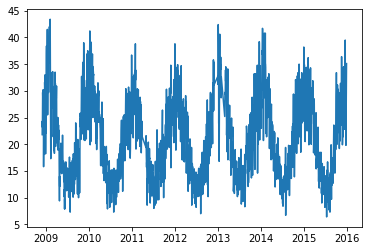

In [10]:
plt.plot(data2['Date'],data2['Temp3pm'])
plt.show()

In [11]:
data=data2[['Date','Temp3pm']]
data.dropna(inplace=True)
data.columns=['ds','y']
data

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



,ds,y
0,2008-12-01,21.8
1,2008-12-02,24.3
2,2008-12-03,23.2
3,2008-12-04,26.5
4,2008-12-05,29.7
...,...,...
2493,2015-12-27,22.7
2494,2015-12-28,26.5
2495,2015-12-29,29.8
2496,2015-12-30,33.1


In [12]:
np=NeuralProphet()
np.fit(data,freq='D',epochs=1000)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/269 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.12E-02, min: 1.54E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.94E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [02:56<00:00,  5.65it/s, SmoothL1Loss=0.00904, MAE=2.88, MSE=13.8, RegLoss=0]


,SmoothL1Loss,MAE,MSE,RegLoss
0,0.681550,29.777140,1442.166871,0.0
1,0.256383,15.986592,429.846985,0.0
2,0.058323,7.709370,88.866180,0.0
3,0.017488,4.142668,26.643044,0.0
4,0.010565,3.123976,16.096267,0.0
...,...,...,...,...
995,0.009043,2.877082,13.776449,0.0
996,0.009042,2.876947,13.774958,0.0
997,0.009040,2.876669,13.772358,0.0
998,0.009039,2.876396,13.771079,0.0


In [16]:
future=np.make_future_dataframe(data,periods=2200)
forecast=np.predict(future)
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
2195,2022-01-04,None,35.444637,NaN,26.816511,8.524300,0.103825
2196,2022-01-05,None,35.376362,NaN,26.818604,8.702988,-0.145233
2197,2022-01-06,None,35.703587,NaN,26.820696,8.877869,0.005020
2198,2022-01-07,None,35.931789,NaN,26.822790,9.047945,0.061055
2199,2022-01-08,None,35.976421,NaN,26.824883,9.212237,-0.060697


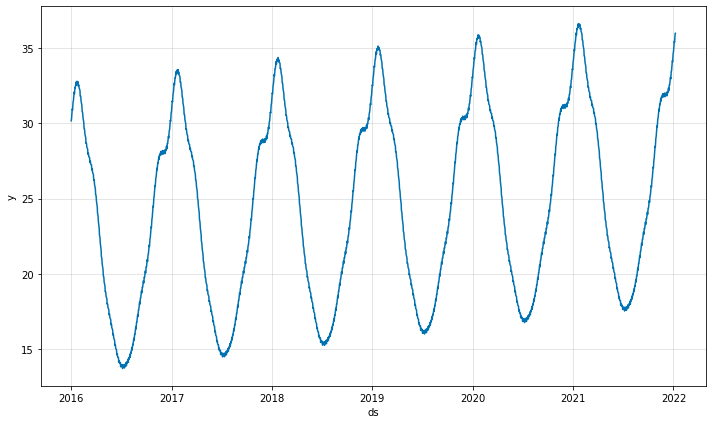

In [17]:
plotting=np.plot(forecast)

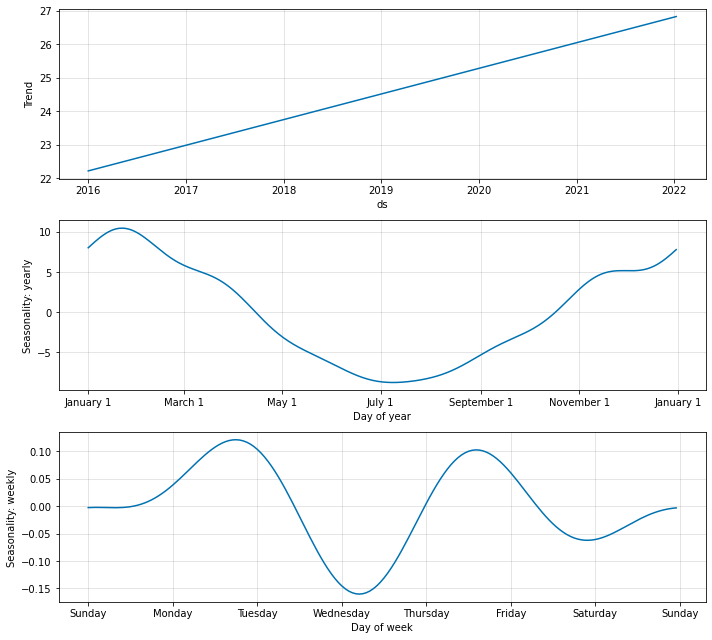

In [18]:
plotting2=np.plot_components(forecast)

In [20]:
import pickle

In [21]:
pickle.dump(np,open('fore.pkl','wb'))